In [42]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [43]:
img1_path = "/content/24_training.tif"
img2_path = "/content/32_training.tif"
img3_path = "/content/36_training.tif"

In [44]:
#gaussain blur parameters
kernel_size = 15
sigma = 3.0

In [45]:
#loading image
img_bgr1 = cv2.imread(img1_path) #opencv load image by default as bgr
img_rgb1 = cv2.cvtColor(img_bgr1, cv2.COLOR_BGR2RGB)

img_bgr2 = cv2.imread(img2_path)
img_rgb2 = cv2.cvtColor(img_bgr2, cv2.COLOR_BGR2RGB)

img_bgr3 = cv2.imread(img3_path)
img_rgb3 = cv2.cvtColor(img_bgr3, cv2.COLOR_BGR2RGB)

In [46]:
green1 = img_rgb1[:, :, 1] #green channel
green2 = img_rgb2[:, :, 1]
green3 = img_rgb3[:, :, 1]

In [47]:
low_freq1 = cv2.GaussianBlur(green1, (kernel_size, kernel_size), sigmaX=sigma) #gaussain blur
low_freq2 = cv2.GaussianBlur(green2, (kernel_size, kernel_size), sigmaX=sigma)
low_freq3 = cv2.GaussianBlur(green3, (kernel_size, kernel_size), sigmaX=sigma)

In [48]:
high_freq_signed1 = green1.astype(np.int16) - low_freq1.astype(np.int16) #high frequency extraction
high_freq_signed2 = green2.astype(np.int16) - low_freq2.astype(np.int16)
high_freq_signed3 = green3.astype(np.int16) - low_freq3.astype(np.int16)

In [49]:
#normalisation - for visualisation
hf_min1, hf_max1 = high_freq_signed1.min(), high_freq_signed1.max()
high_freq_norm1 = ((high_freq_signed1 - hf_min1) / (hf_max1 - hf_min + 1e-8) * 255.0).astype(np.uint8)


hf_min2, hf_max2 = high_freq_signed2.min(), high_freq_signed2.max()
high_freq_norm2 = ((high_freq_signed2 - hf_min2) / (hf_max2 - hf_min2 + 1e-8) * 255.0).astype(np.uint8)

hf_min3, hf_max3 = high_freq_signed3.min(), high_freq_signed3.max()
high_freq_norm3 = ((high_freq_signed3 - hf_min3) / (hf_max3 - hf_min3 + 1e-8) * 255.0).astype(np.uint8)


In [50]:
#CLAHE enhanced - for visualisation
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
high_freq_vis1 = clahe.apply(high_freq_norm1)
high_freq_vis2 = clahe.apply(high_freq_norm2)
high_freq_vis3 = clahe.apply(high_freq_norm3)


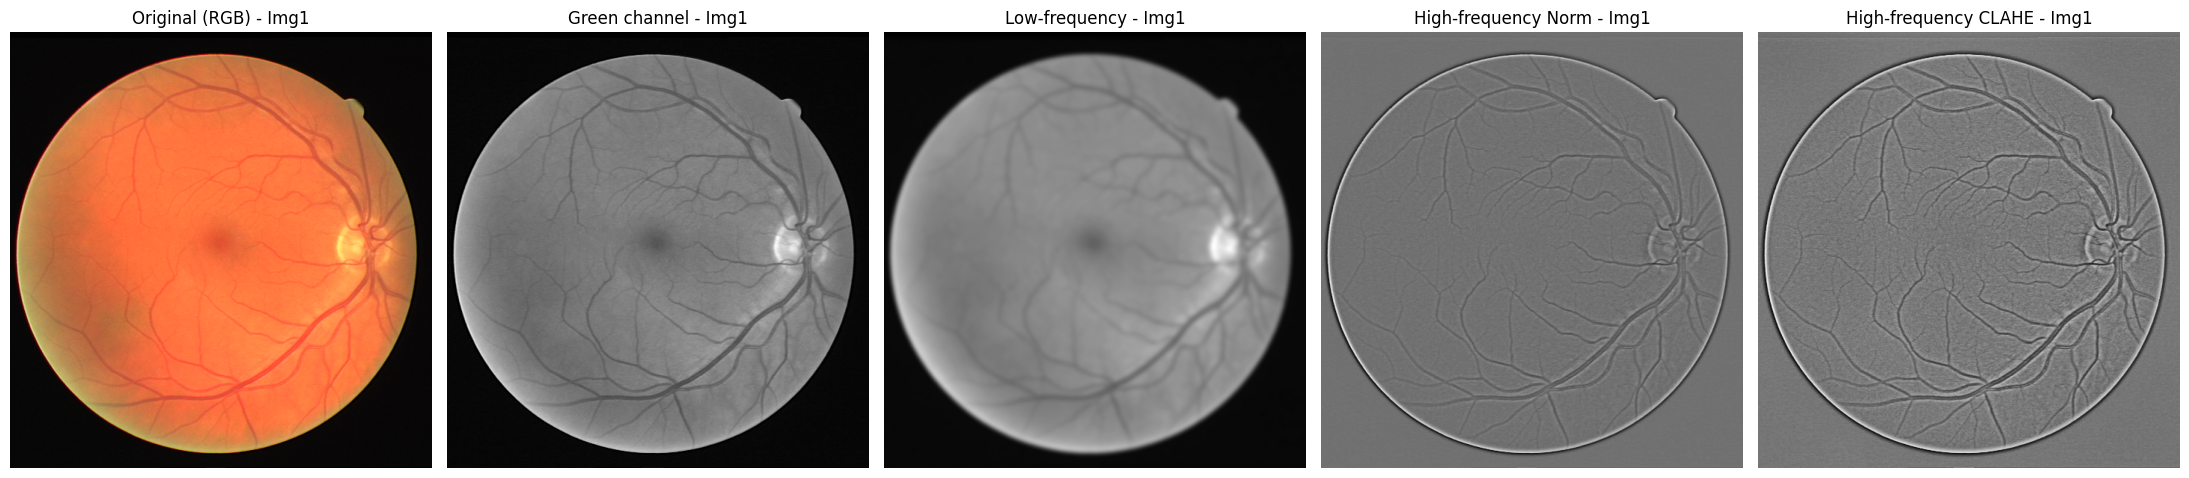

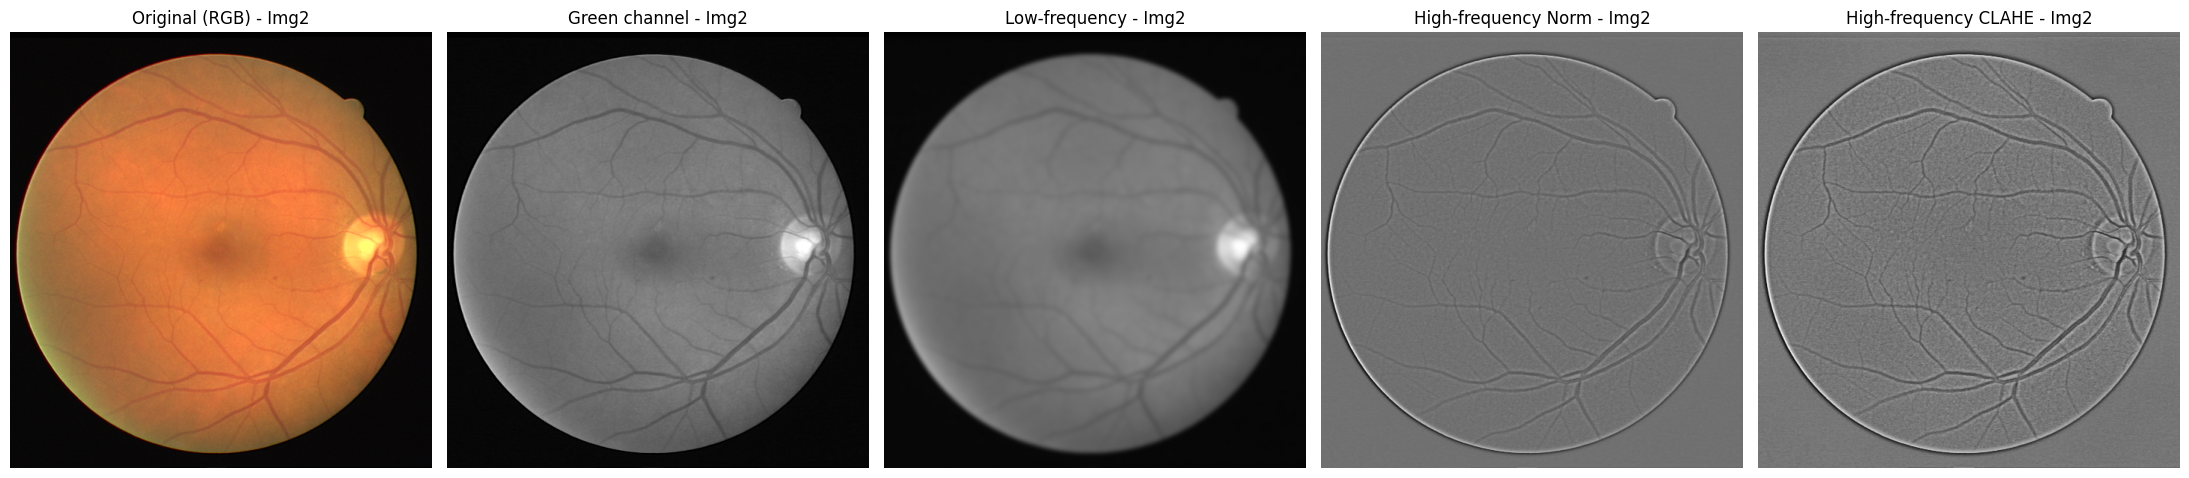

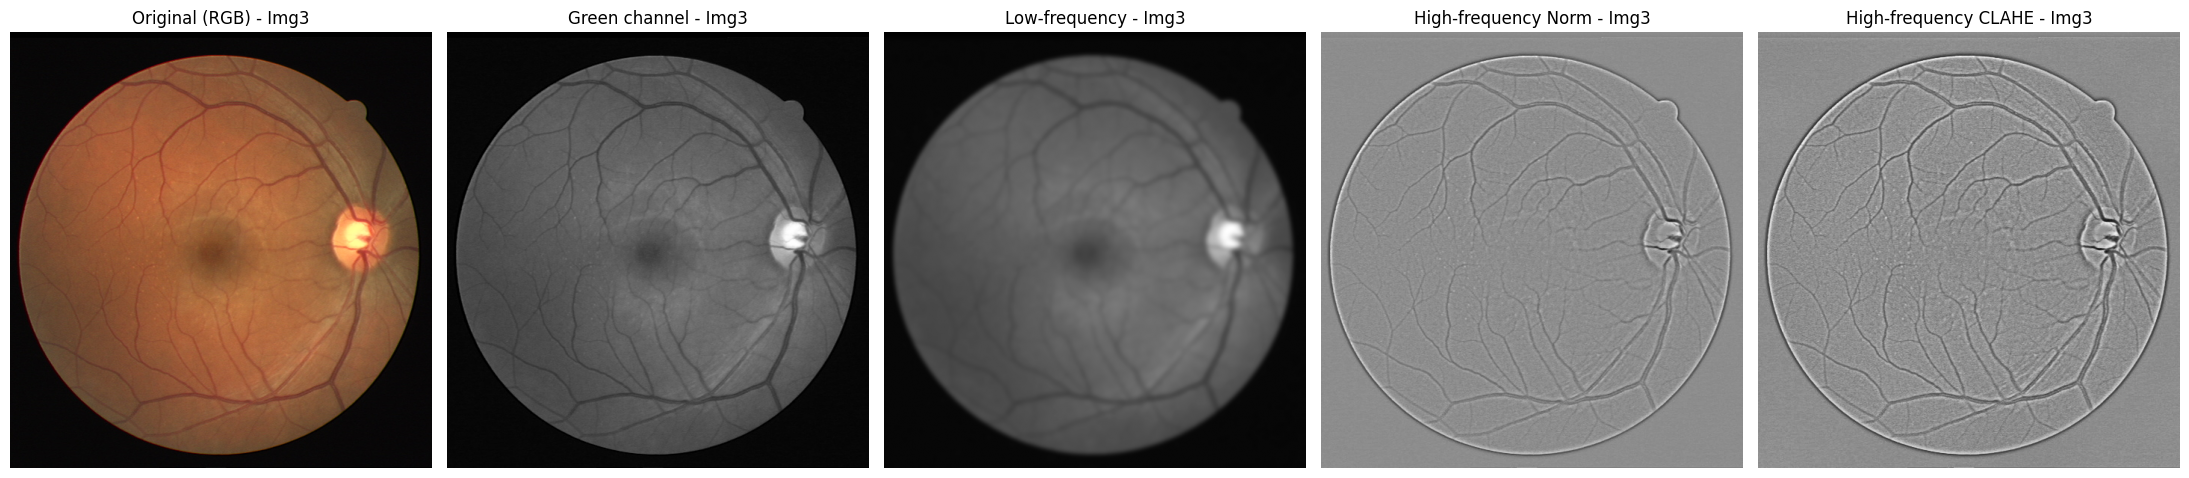

In [51]:
import matplotlib.pyplot as plt

# List of images and their processed channels
images = [
    (img_rgb1, green1, low_freq1, high_freq_norm1, high_freq_vis1, "Img1"),
    (img_rgb2, green2, low_freq2, high_freq_norm2, high_freq_vis2, "Img2"),
    (img_rgb3, green3, low_freq3, high_freq_norm3, high_freq_vis3, "Img3")
]

for img_rgb, green, low_freq, hf_norm, hf_vis, label in images:
    fig, axes = plt.subplots(1, 5, figsize=(22, 5))

    axes[0].imshow(img_rgb)
    axes[0].set_title(f"Original (RGB) - {label}")
    axes[0].axis('off')

    axes[1].imshow(green, cmap='gray')
    axes[1].set_title(f"Green channel - {label}")
    axes[1].axis('off')

    axes[2].imshow(low_freq, cmap='gray')
    axes[2].set_title(f"Low-frequency - {label}")
    axes[2].axis('off')

    axes[3].imshow(hf_norm, cmap='gray')
    axes[3].set_title(f"High-frequency Norm - {label}")
    axes[3].axis('off')

    axes[4].imshow(hf_vis, cmap='gray')
    axes[4].set_title(f"High-frequency CLAHE - {label}")
    axes[4].axis('off')

    plt.tight_layout()
    plt.show()

    # Saving figures
    out_fig = f"anatomical_extraction_{label}.png"
    fig.savefig(out_fig, dpi=150)

